# Clustering Assignment

In [1]:
# Filtering out the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading and understanding the data

In [3]:
# Importing the 'Country-data' Dataset.
df=pd.read_csv('Country-data.csv')

In [4]:
# Checking the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Importing the data dictionary for our reference.
data_dict = pd.read_csv('data-dictionary+.csv')
data_dict.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [6]:
# Checking the shape of the Dataset.
df.shape

(167, 10)

In [7]:
# Checking data type of variables and for the presence of null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
# Checking for null values.
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
# Describing the data.
df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


## Cleaning the data

In [10]:
# Converting exports,imports and health spending percentages to absolute values.

df['exports'] =df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [11]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Data Visualization

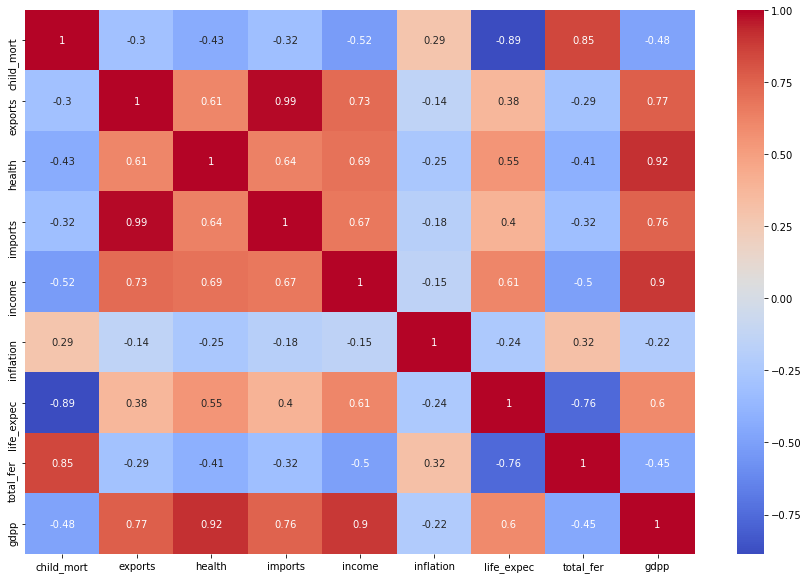

In [12]:
# Plotting a Heatmap to understand the correlation.

plt.figure(figsize = (15,10))        
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')
plt.show()

### From the above heatmap the following inference can be made:

>- Income and health are highly correlated with GDP, import and exports are also highly correlated with GDP which is expected.
>- Imports is very highly correlated with exports.
>- Child Mortality is highly correlated with total fertility.
>- Life expectancy is highly negatively correlated with total fertility.

In [13]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [14]:
# Creating a list of colums names.
cols=list(df.columns)
cols

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [15]:
# Excluding the country column.
cols=cols[1:]

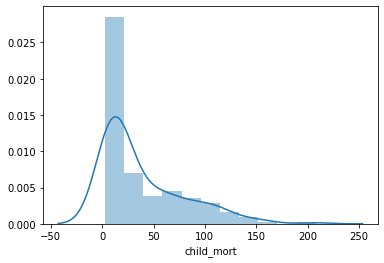

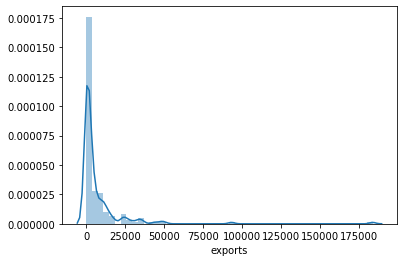

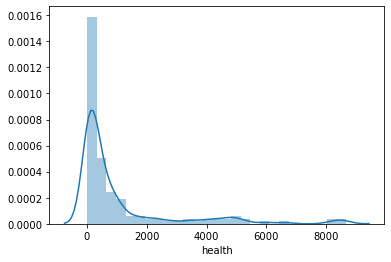

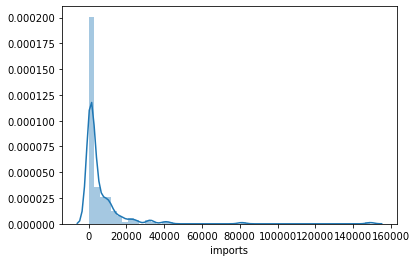

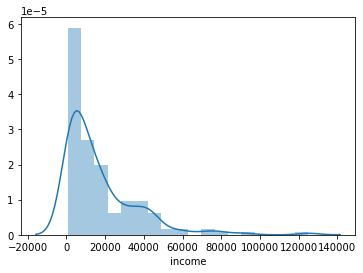

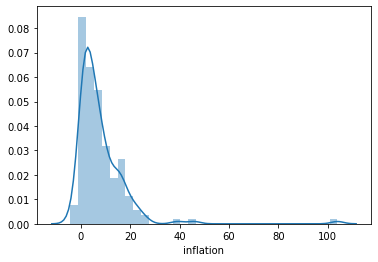

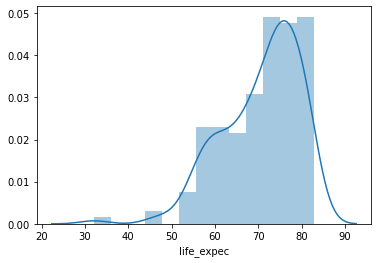

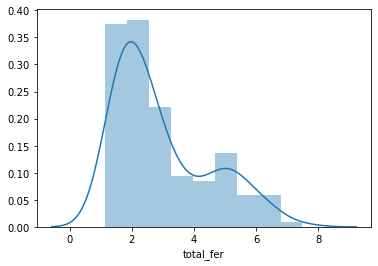

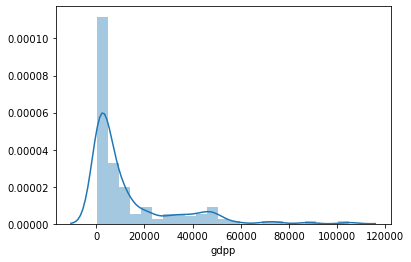

In [16]:
# Distribution pl0ts of all the numeric variables.
for i in cols:
    sns.distplot(df[i])
    plt.show()

### From the above plots the following inferences can be made:

>- Child mortality, income and gdpp variables seem to be most important variables in our analysis.


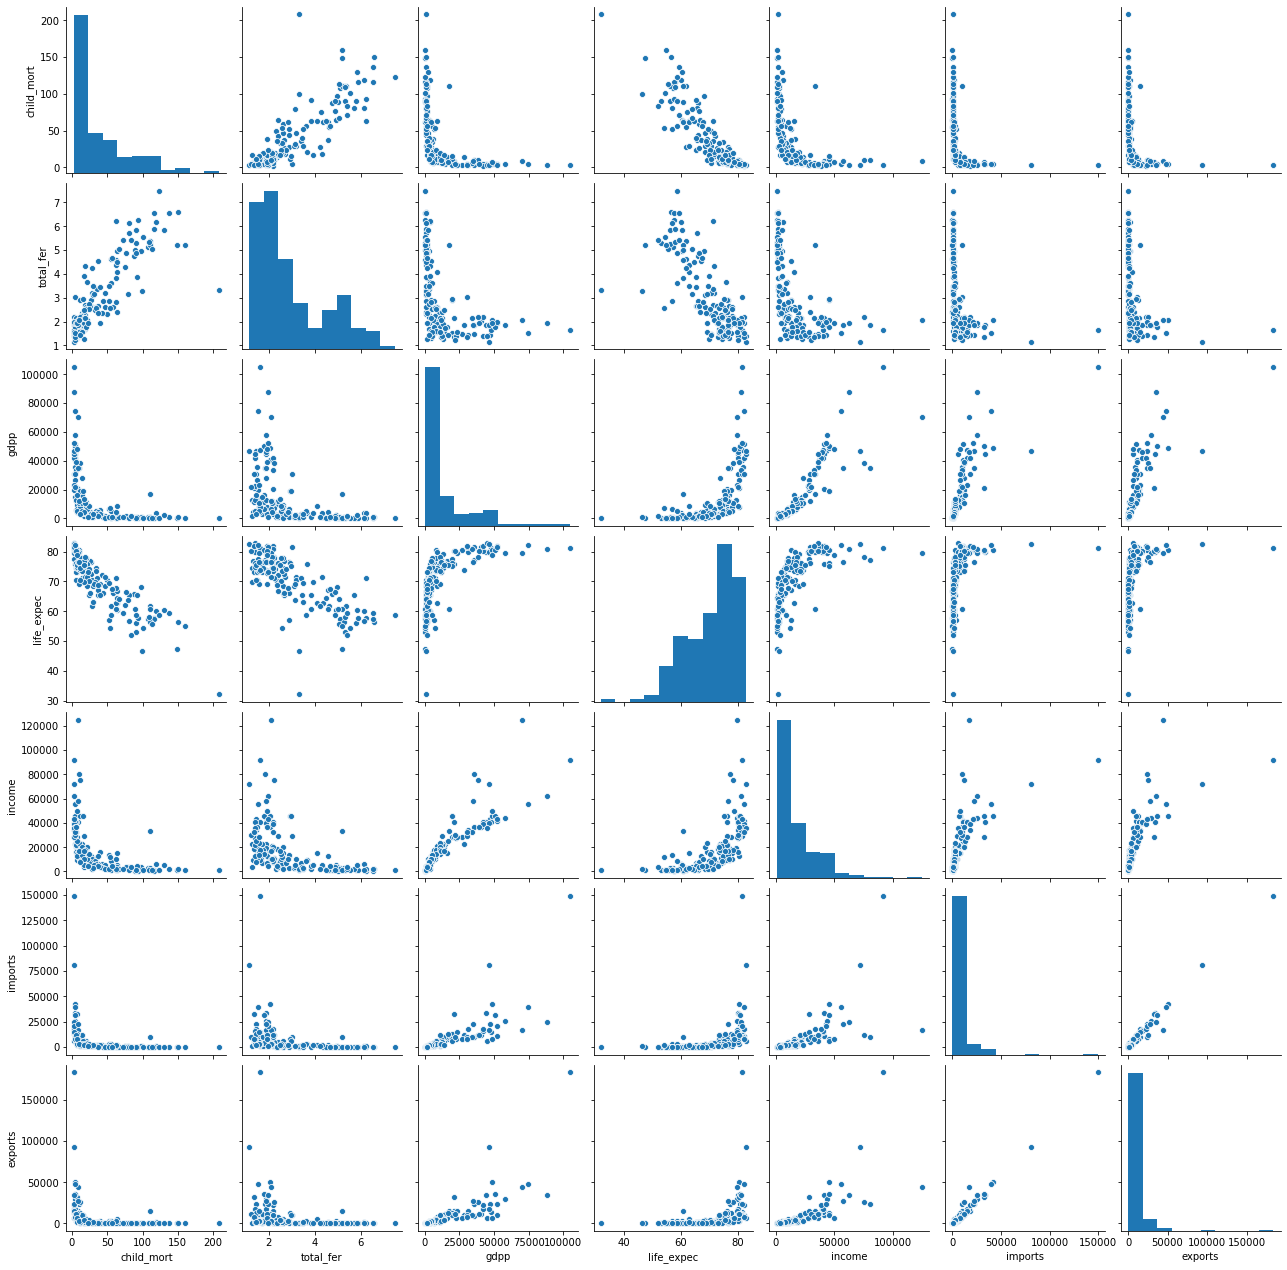

In [17]:
sns.pairplot(df, vars=["child_mort", 'total_fer','gdpp','life_expec','income', 'imports', 'exports'])
plt.show()

### From the above plots the following inferences can be made:

>- Exports and imports are linearly related.
>- Income and GDP and also linearly related.
>- Child mortality also seems to be linearly related with total fertility.

In [18]:
countries= df.groupby('country').child_mort.sum().sort_values(ascending=False)
countries=pd.DataFrame(countries)
topCountries=countries.head()
bottomCountries=countries.tail()

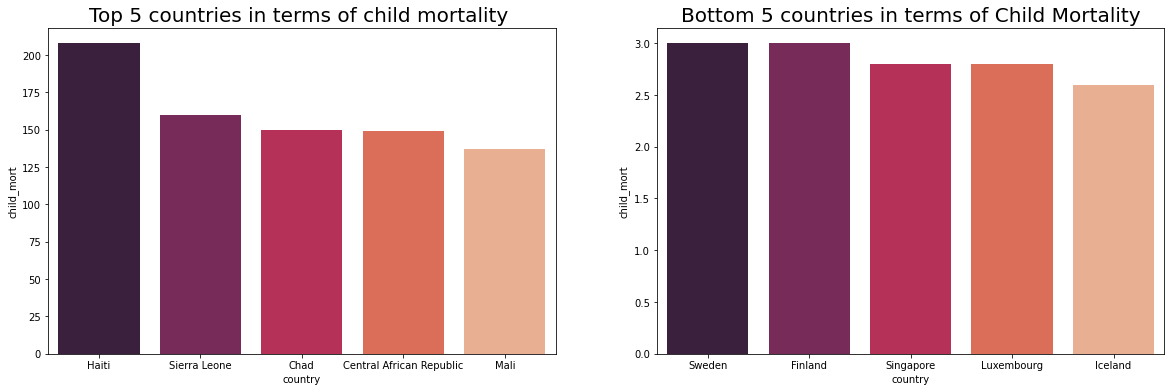

In [19]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(topCountries.index, topCountries.child_mort, palette='rocket')
plt.title('Top 5 countries in terms of child mortality ', size=20)
plt.subplot(1,2,2)
sns.barplot(bottomCountries.index, bottomCountries.child_mort, palette='rocket')
plt.title('Bottom 5 countries in terms of Child Mortality', size=20)
plt.show()

### From the above plots the following inferences can be made:

>- Haiti has a very high child mortality of around 200 for every 1000 children born, which means 20% of the children die within the age of 5, followed by Sierra leone with 150.
>- Sweden, Finland, Singapore and Luxembourg have a very low child mortality of below 3.

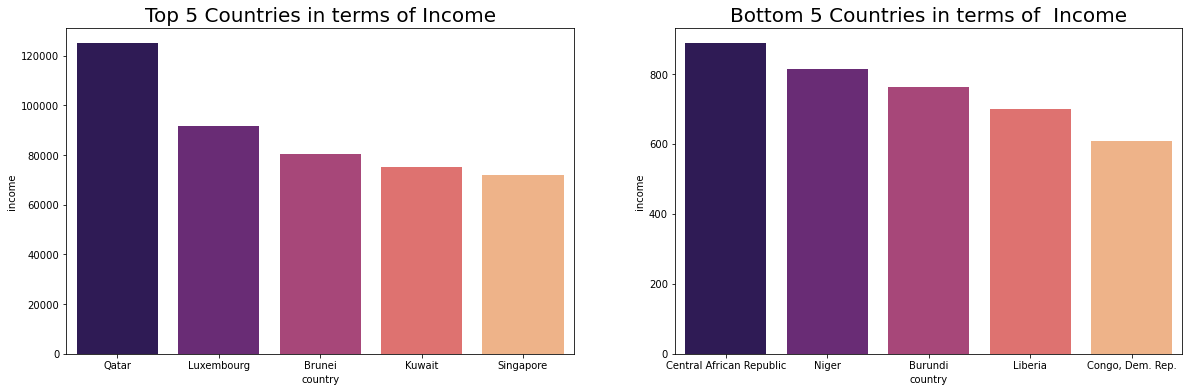

In [20]:
income= df.groupby('country').income.sum().sort_values(ascending=False)
income=pd.DataFrame(income)
highIncome=income.head()
lowIncome=income.tail()
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(highIncome.index, highIncome.income, palette='magma')
plt.title('Top 5 Countries in terms of Income', size=20)
plt.subplot(1,2,2)
sns.barplot(lowIncome.index, lowIncome.income, palette='magma')
plt.title('Bottom 5 Countries in terms of  Income', size=20)
plt.show()

### From the above plots the following inferences can be made:

>- Qatar has an exeptionally high income, followed by Luxembourg.
>-  Central African Republic, Niger , Burundi and Liberia belong to Africa, therefore most of the African countries have low income. 

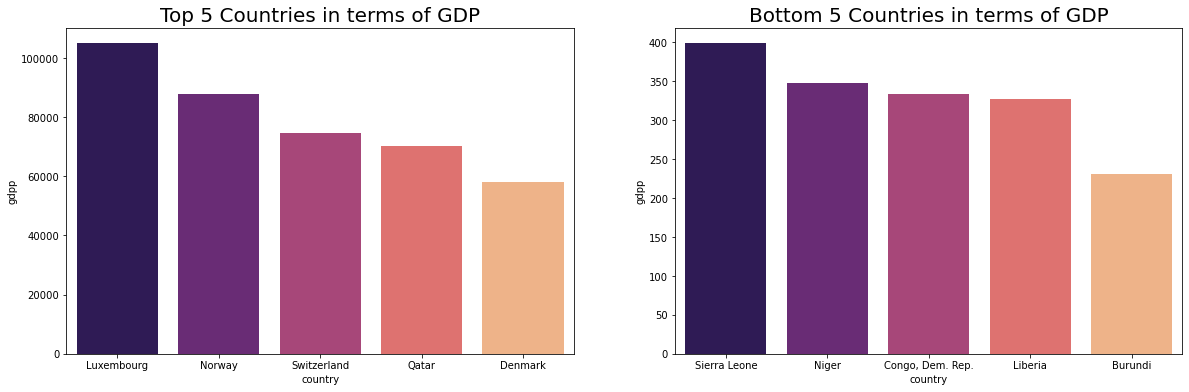

In [21]:
gdp=df.groupby('country').gdpp.sum().sort_values(ascending=False)
gdp=pd.DataFrame(gdp)
topGdp=gdp.head()
bottomGdp=gdp.tail()
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
sns.barplot(x=topGdp.index,y=topGdp.gdpp, palette='magma')
plt.title("Top 5 Countries in terms of GDP",size=20)
plt.subplot(1,2,2)
sns.barplot(x=bottomGdp.index,y=bottomGdp.gdpp,palette='magma')
plt.title("Bottom 5 Countries in terms of GDP",size=20)
plt.show()

### From the above plots the following inferences can be made:

>- We see almost similar stats for GDP compared to income, Luxembourg having the highest GDP.
>- As expected we see the African countries with lowest GDP's.

## Outlier Analysis

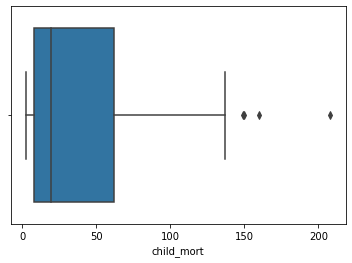

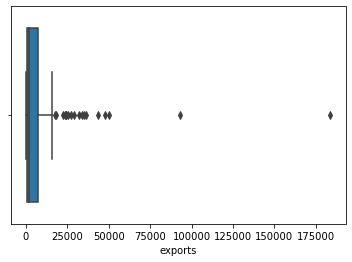

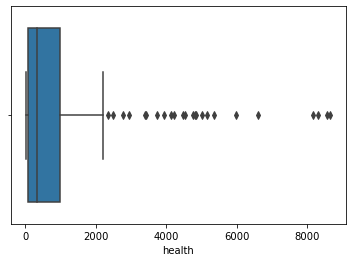

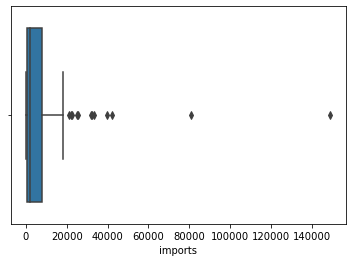

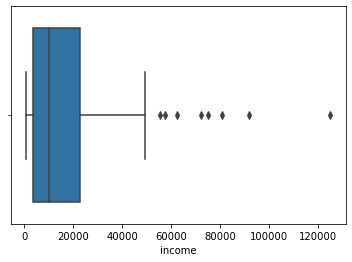

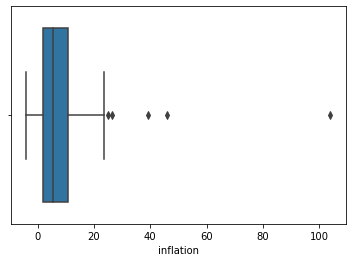

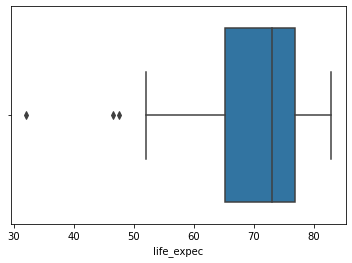

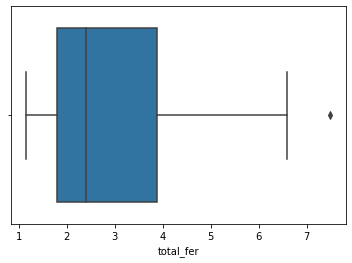

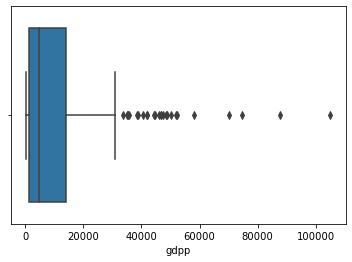

In [22]:
for i in cols:
    sns.boxplot(df[i])
    plt.show()

### From the above plots the following inferences can be made:

>- All the variables have some sort of outliers.
>- Exports, imports, gdpp have extreme outliers. 

In [23]:
# Soft capping.

for column in df.columns[1:]:
    percentiles = df[column].quantile([0.01, 0.99]).values
    df[column] = np.clip(df[column], percentiles[0], percentiles[1])

In [24]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,6538.351334,1054.240319,5873.845499,16858.601677,7.397332,70.645269,2.942896,12757.456527
std,39.026793,11415.230052,1790.825675,9422.259867,17956.060832,7.770993,8.553975,1.497595,17429.755235
min,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [25]:
# Hopkins Test. 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [26]:
hopkins(df.drop('country', axis = 1))

0.9486184397553141

In [27]:
# Scaling the data.
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.34401227, -0.56963804, -0.56698288, ..., -1.69379898,
         1.92692802, -0.70231404],
       [-0.54754345, -0.47387318, -0.44041711, ...,  0.66305283,
        -0.86591134, -0.49877488],
       [-0.27254826, -0.42401465, -0.48629503, ...,  0.68650409,
        -0.03542674, -0.47748297],
       ...,
       [-0.3753502 , -0.49162206, -0.54027452, ...,  0.28783264,
        -0.66498765, -0.65875194],
       [ 0.47276581, -0.53996578, -0.55245405, ..., -0.36880269,
         1.15672052, -0.65875194],
       [ 1.16153882, -0.52703195, -0.54229642, ..., -2.18627548,
         1.64563484, -0.65012008]])

In [28]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


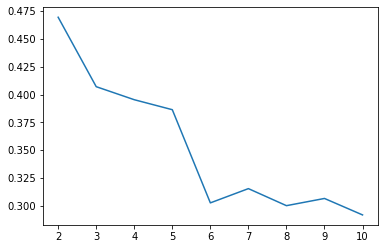

In [29]:
# Silhouette score to decide the value of k.
ss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

plt.show()

### From the above plot the following inferences can be made:

>- 3 clusters seems to be best choice.


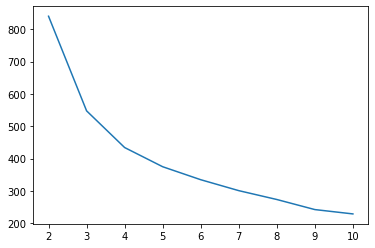

In [30]:
# Elbow curve.
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

### From the above plot the following inferences can be made:

>- From the elbow curve above we can see that a breakpoint is present at 3 and at 4.
>- Observing both Silhouette scores and the elbow curve, 3 clusters seems to be the best choice.

In [31]:
# Proceeding with 3 clusters.
kmeans = KMeans(n_clusters = 3, random_state = 50)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=50)

In [32]:
# Cluster centers.
kmeans.cluster_centers_

array([[-0.44608365, -0.26896584, -0.29423633, -0.24319265, -0.17060836,
        -0.03429503,  0.32222783, -0.46902602, -0.28478671],
       [-0.84593495,  1.65776344,  1.78390839,  1.64390447,  1.72748481,
        -0.57960501,  1.15003041, -0.79401299,  1.91688659],
       [ 1.34749254, -0.49725446, -0.52608487, -0.53720606, -0.72379806,
         0.41448121, -1.29898722,  1.35913998, -0.6241439 ]])

In [33]:
# Looking at the labels.
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [34]:
# Adding the corresponding labels to the dataframe.
df['labels'] = kmeans.labels_

In [35]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [36]:
# Number of countries in each cluster.
df.labels.value_counts()

0    90
2    48
1    29
Name: labels, dtype: int64

>- It is evident that Cluster 1 is having a high number of data points compared to the other two clusters.

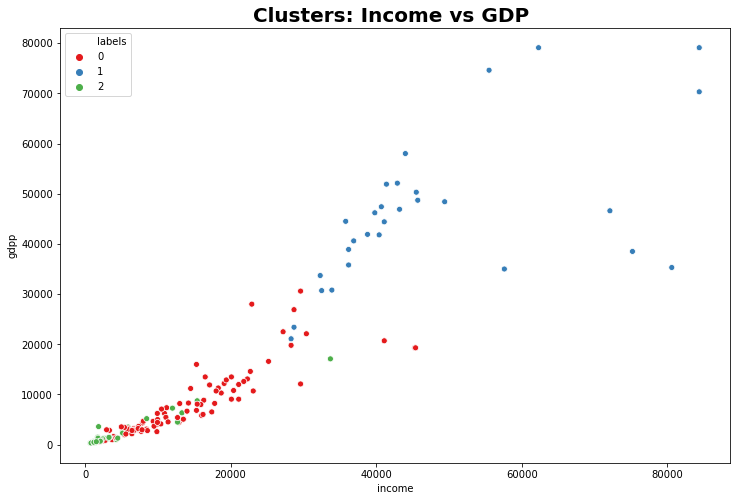

In [37]:
# Plotting the clusters.
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'labels', data = df, palette = 'Set1')
plt.title('Clusters: Income vs GDP ',fontweight="bold", size=20)
plt.show()

### From the above plots the following inferences can be made:

>- We can see that the 3 clusters can be distinguished pretty well.
>- Cluster 1 has high intra-cluster distance.

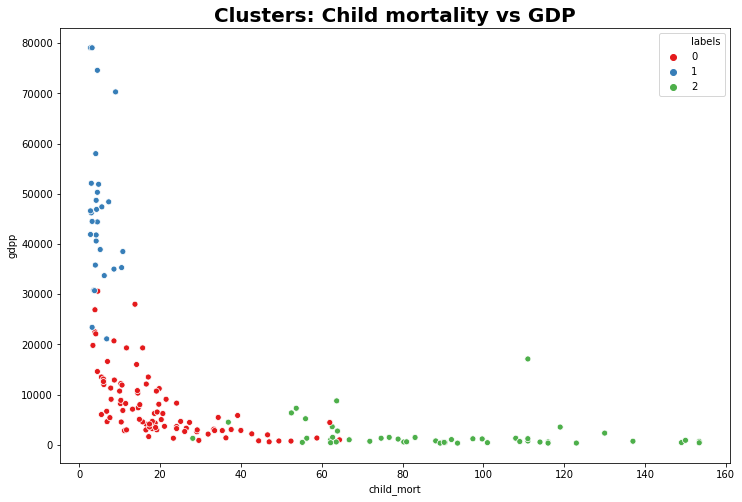

In [38]:
# Plotting the clusters.
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'labels', data = df, palette = 'Set1')
plt.title('Clusters: Child mortality vs GDP',fontweight="bold", size=20 )
plt.show()

### From the above plots the following inferences can be made:

>- We can see that the 3 clusters can be distinguished pretty well.

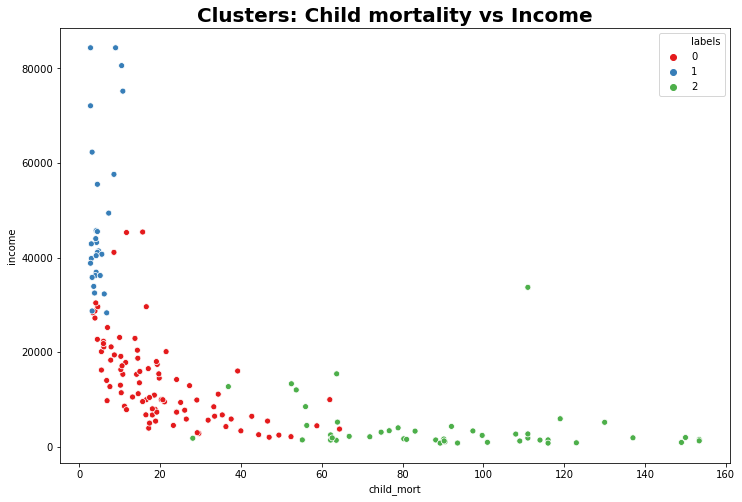

In [39]:
# Plotting the clusters.
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'labels', data = df, palette = 'Set1')
plt.title('Clusters: Child mortality vs Income',fontweight="bold", size=20)
plt.show()

### From the above plots the following inferences can be made:

>- We can see that the 3 clusters can be distinguished pretty well.

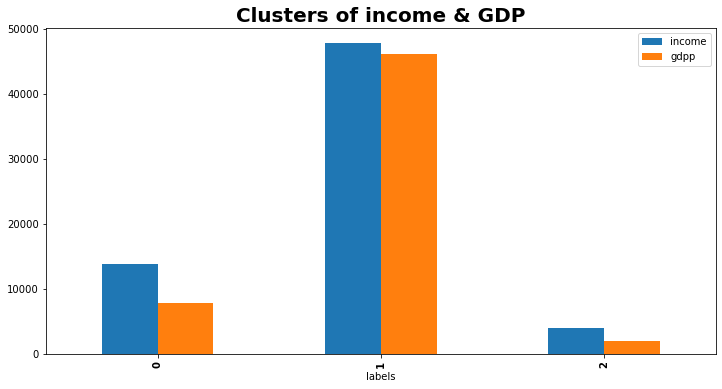

In [40]:
# Barplot of clusters.
df.drop(['country', 'exports', 'health', 'imports','child_mort','inflation', 'life_expec', 'total_fer'],axis = 1).groupby('labels').mean().plot.bar(figsize=(12,6))
plt.title('Clusters of income & GDP',fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

### From the above plots the following inferences can be made:

>- We see that cluster 2 has low income and GDP 

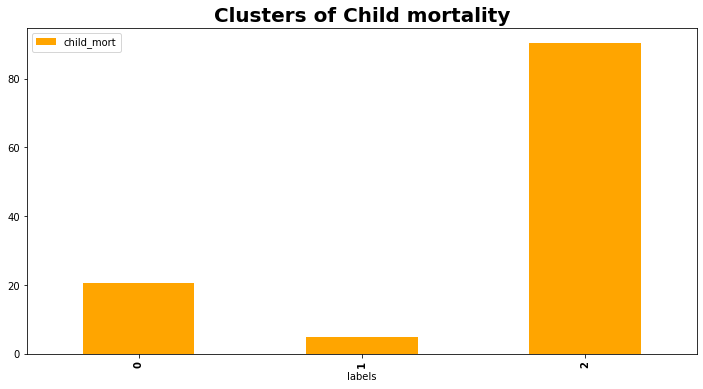

In [41]:
# Barplot of clusters.
df.drop(['country', 'exports', 'health', 'imports','income', 'gdpp','inflation', 'life_expec', 'total_fer'],axis = 1).groupby('labels').mean().plot.bar(figsize=(12,6),color='orange')
plt.title('Clusters of Child mortality', fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

### From the above plots the following inferences can be made:

>- We see that cluster 2 has high child mortality, so we need to focus on this cluster.
>- This is the same cluster that also has low income and low gdp, therefore it is confirmed that we need to focus on this cluster.

In [42]:
# New dataframe with only cluster 2.
c1 = df[df['labels']==2]
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


In [43]:
# Number of countries in cluster 2.
c1['labels'].value_counts()

2    48
Name: labels, dtype: int64

In [44]:
# Sorting the countries.
c1.sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.00,17.200,55.00,5.2000,399.0,2
66,Haiti,153.4,101.286,45.7442,428.314,1500.00,5.450,47.16,3.3300,662.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.00,6.390,56.50,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.00,2.010,47.50,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.00,4.370,59.50,6.5500,708.0,2
113,Nigeria,130.0,589.490,118.1310,405.420,5150.00,41.478,60.50,5.8400,2330.0,2
112,Niger,123.0,77.256,17.9568,170.868,814.00,2.550,58.80,6.5636,348.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.00,22.400,60.10,6.1600,3530.0,2
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,742.24,20.800,57.50,6.5400,334.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.00,6.810,57.90,5.8700,575.0,2


## Heirarchical clustering


In [45]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


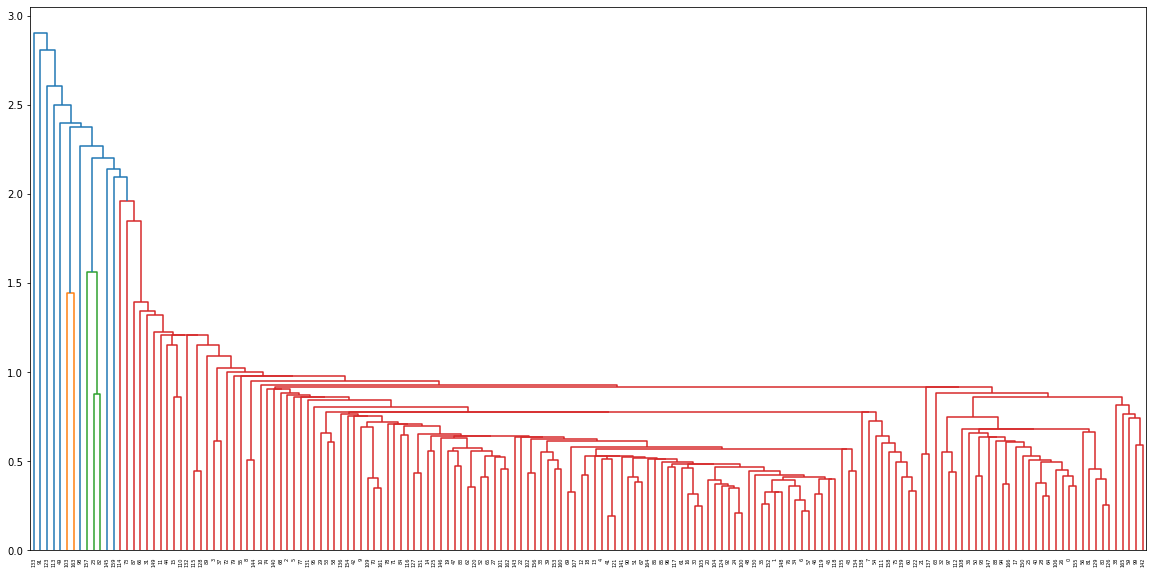

In [46]:
# Single linkage dendrogram.

plt.figure(figsize = (20,10))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

>- It is clearly evident that single linkage does not provide good results, therefore lets proceed with complete linkage.

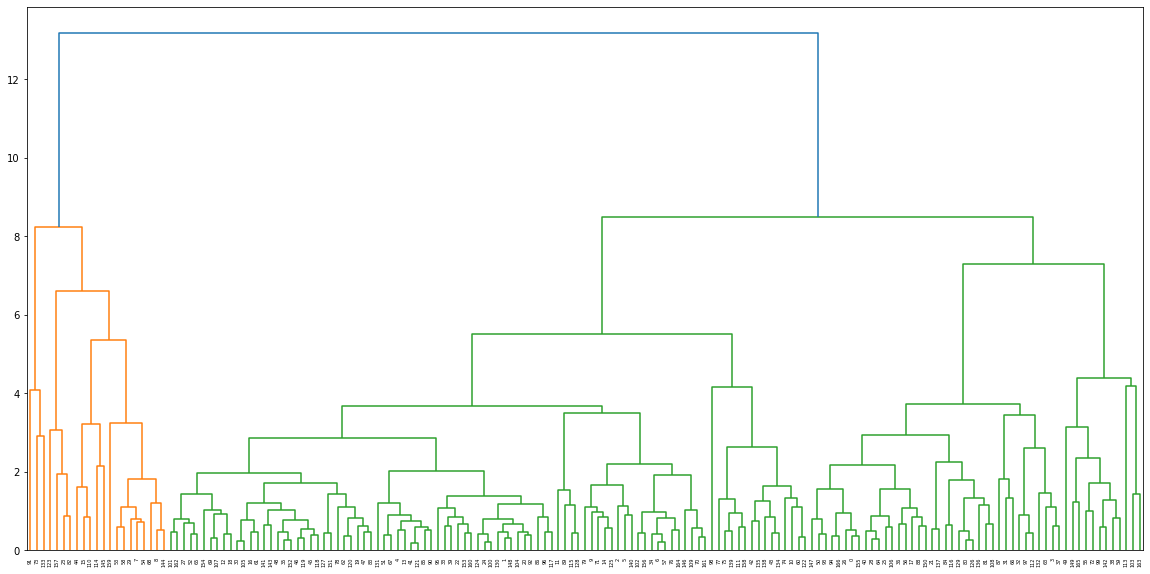

In [47]:
# Complete linkage dendrogram.

plt.figure(figsize = (20,10))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

>- With the complete linkage dendrogram it looks like the clusters are evident and can be analysed easily.

In [48]:
# Taking number of clusters as 3
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [49]:
df['cluster_labels'] = cluster_labels

In [50]:
df.cluster_labels.value_counts()

1    96
0    50
2    21
Name: cluster_labels, dtype: int64

In [51]:
# Assigning cluster labels.
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


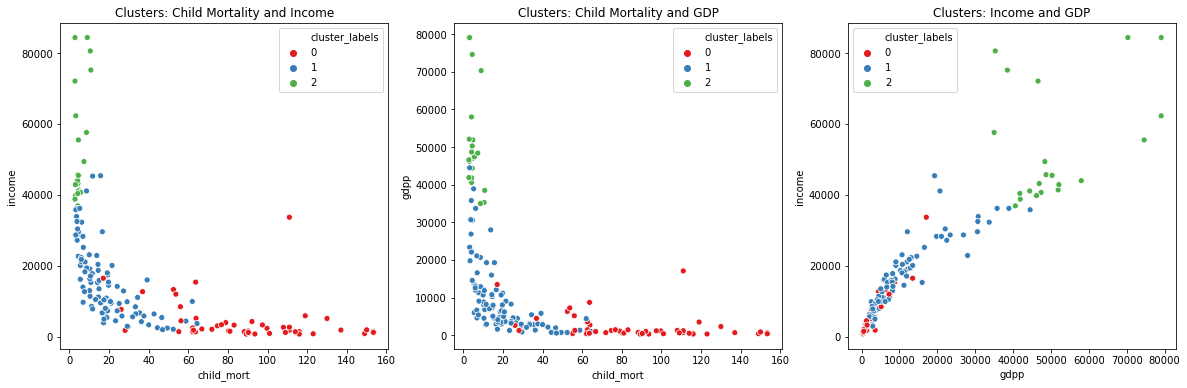

In [52]:
# Plotting the clusters.

plt.figure(figsize=[20,6])
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='cluster_labels',data=df, palette='Set1')
plt.title('Clusters: Child Mortality and Income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_labels',data=df, palette='Set1')
plt.title('Clusters: Child Mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels',data=df,palette='Set1')
plt.title('Clusters: Income and GDP')
plt.show()

### From the above plots the following inferences can be made:

>- We can see that the 3 clusters can be distinguished pretty well in all the scatter plots.
>- We can see a similar distribution for both k means and heirarchical clustering.

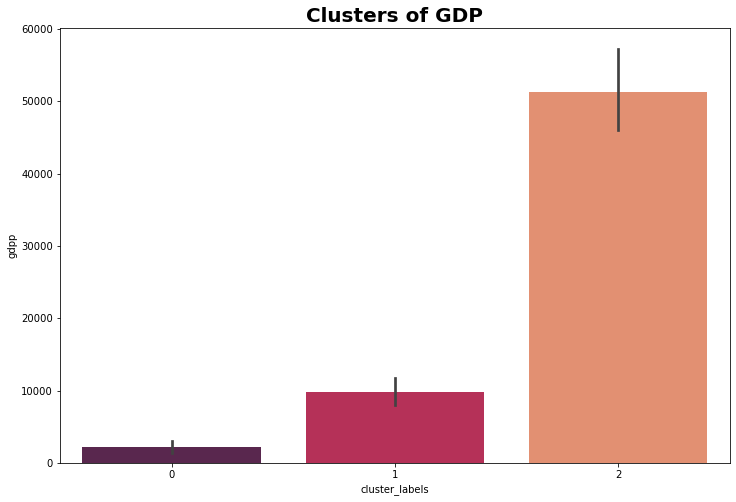

In [53]:
# Boxplot of clusters.
plt.figure(figsize = (12,8))
sns.barplot(x='cluster_labels', y='gdpp', data=df, palette='rocket')
plt.title('Clusters of GDP',fontweight="bold", size=20)
plt.show()

### From the above plots the following inferences can be made:

>- We can see that cluster 0 has loweset GDP and cluster 2 has highest GDP

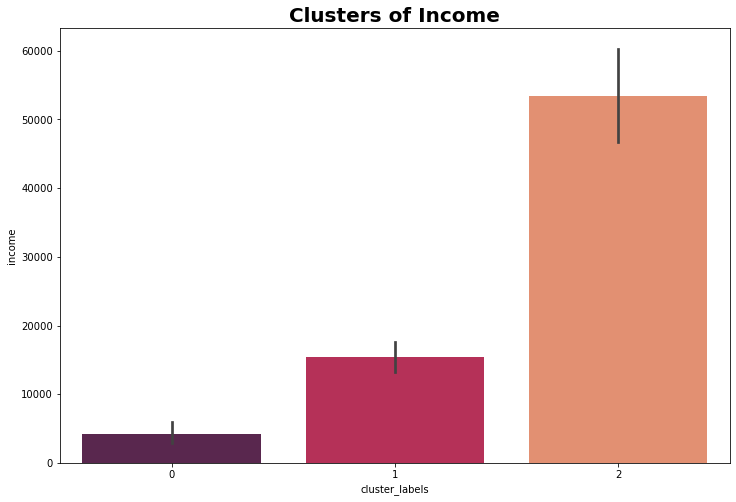

In [54]:
# Boxplot of clusters.
plt.figure(figsize = (12,8))
sns.barplot(x='cluster_labels', y='income', data=df, palette='rocket')
plt.title('Clusters of Income',fontweight="bold", size=20)
plt.show()

### From the above plots the following inferences can be made:

>- We can see that cluster 0 has lowest GDP and cluster 2 has highest GDP

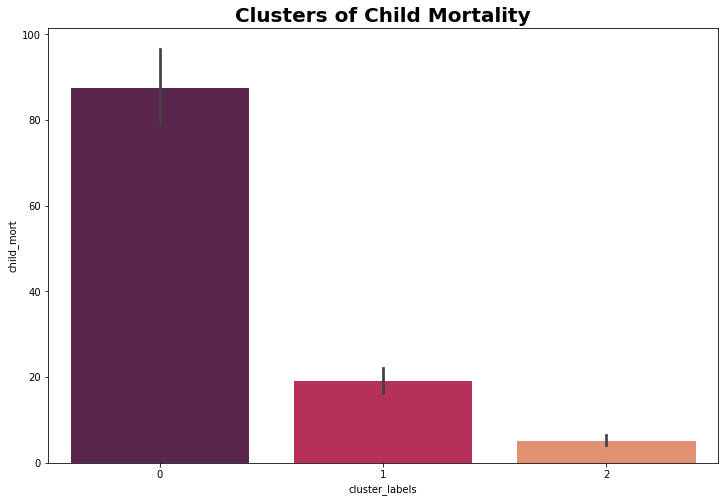

In [55]:
# Boxplot of clusters.
plt.figure(figsize = (12,8))
sns.barplot(x='cluster_labels', y='child_mort', data=df,palette='rocket')
plt.title('Clusters of Child Mortality',fontweight="bold", size=20)
plt.show()

### From the above plots the following inferences can be made:

>- We can see that cluster 0 has high Child Mortality and cluster 2 has lowest Child Mortality.
>- Looking at all the 3 plots we can conclude that countries that belong to cluster 0 are in need of help.

In [56]:
c2=df[df['cluster_labels']==0]
c2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2,0


In [57]:
c2['cluster_labels'].value_counts()

0    50
Name: cluster_labels, dtype: int64

In [58]:
# Top 10 countries in the direst need of aid.
c2.sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.00,17.200,55.00,5.2000,399.0,2,0
66,Haiti,153.4,101.286,45.7442,428.314,1500.00,5.450,47.16,3.3300,662.0,2,0
32,Chad,150.0,330.096,40.6341,390.195,1930.00,6.390,56.50,6.5636,897.0,2,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.00,2.010,47.50,5.2100,446.0,2,0
97,Mali,137.0,161.424,35.2584,248.508,1870.00,4.370,59.50,6.5500,708.0,2,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150.00,41.478,60.50,5.8400,2330.0,2,0
112,Niger,123.0,77.256,17.9568,170.868,814.00,2.550,58.80,6.5636,348.0,2,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.00,22.400,60.10,6.1600,3530.0,2,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,742.24,20.800,57.50,6.5400,334.0,2,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.00,6.810,57.90,5.8700,575.0,2,0


In [59]:
# Top 5 countries in the direst need of aid.
c2.sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,2,0
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,47.16,3.3300,662.0,2,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5636,897.0,2,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.50,5.2100,446.0,2,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,2,0


## Conclusions:

>- Income, GDP and Child mortality are the most important factors.
>- Countries which have low income also have low GDP, which is resulting in high child mortality.
>- We got similar looking clusters for both k means and hierarchical clustering, the number of values in each cluster is more even in k-means clustering therefore it is more reliable.
>- The child mortality increases with increase in total fertility.
>- The top 10 countires in the direst need to help are : Sierra Leone, Haiti, Chad, Central African Republic, Mali, Nigeria, Niger, Angola, Congo. Dem. Rep. and Burkina Faso
>- Most of these countries belong to Africa, therefore Africa should be the main focus.